In [2]:
# Allowed Additional Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

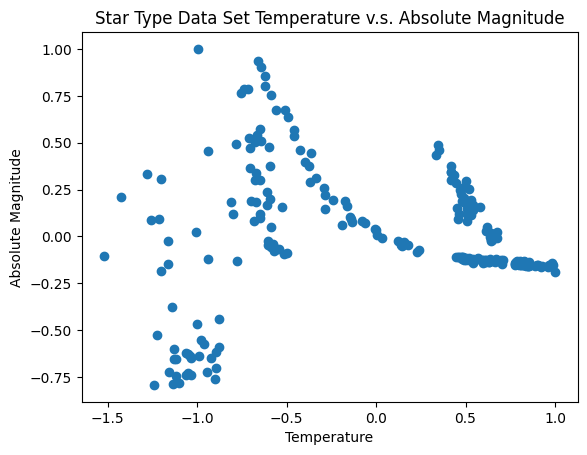

In [3]:
df = pd.read_csv('StarTypeDataset.csv')

plt.scatter(df['Temperature'], df['AbsoluteMagnitude']) # Access the 'Temperature' and 'AbsoluteMagnitude' columns from the DataFrame
plt.title('Star Type Data Set Temperature v.s. Absolute Magnitude')
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.show()

Create a square distance function that computes the square distances between the numpy arrays U and v. U has dimensions of N by D, where N is '' and D is ''. v Has dimensions K by D, where K is ''. Distances has to have a dimension of N by K. So for example U is the set with the data and v is the set with the center points. So this functions computes the distance between each point and the centers

What are the means of the temperature and absolute magnitude? What does this suggest
about the dataset?


In [4]:
train_data = pd.read_csv('StarTypeDataset.csv').to_numpy() # Turning data into numpy array
mean_temp = np.mean(train_data[:, 0]) # Extracting the temperature data to find mean
mean_mag = np.mean(train_data[:, 1]) # Extracting absolute magnitude data to find mean

print(mean_temp)
print(mean_mag)

-7.113333333215917e-07
1.483333333348232e-07


In [5]:
def square_distance(U,v):
  N = len(U) # Lenght of matrix
  K = len(v)
  distances = np.zeros((N,K)) # Create 0 matrix to add values to later
  for i in range(N):
    for j in range(K):
      distance = np.sum((U[i]-v[j])**2) # Calculating square distance between U and v
      distances[i,j] = distance # Assign distance to distances array
  return distances

# Test Variables to see if it works
U = np.array([[2,1], [1,3], [1,3], [2,4], [6,1]])
v = np.array([[1,1], [1,2], [3,4], [1,3], [9,5]])

print(U[1])
print("this:", square_distance(U,v))

[1 3]
this: [[ 1.  2. 10.  5. 65.]
 [ 4.  1.  5.  0. 68.]
 [ 4.  1.  5.  0. 68.]
 [10.  5.  1.  2. 50.]
 [25. 26. 18. 29. 25.]]


What K? Here we can create 5 groups. Plot the data with the initial centers together.

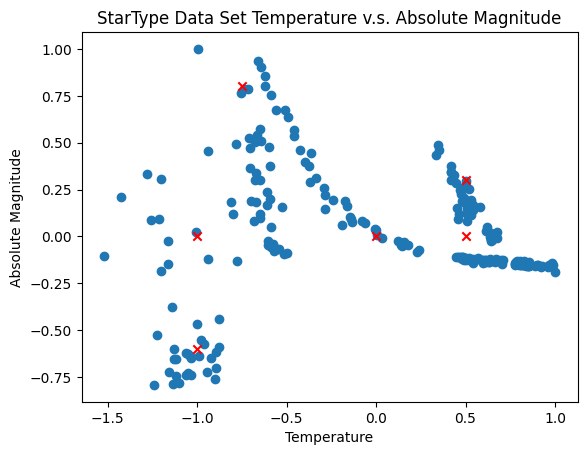

In [6]:
centers = np.array([[-1, 0], [-1, -0.6], [-0.75, 0.8], [0, 0], [0.5, 0], [0.5, 0.3]])
df = pd.read_csv('StarTypeDataset.csv')

plt.scatter(df['Temperature'], df['AbsoluteMagnitude'])  # Scatter plot of Temperature vs. AbsoluteMagnitude
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')  # Overlay centers with a different color and marker
plt.title('StarType Data Set Temperature v.s. Absolute Magnitude')
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.show()

Write a function myKmeans which implements the k-means algorithm. The function should take three inputs:
* The numpy feature matrix of the dataset points
* The number of clusters K
* The maximum number of iterations for the algorithm maxIter

use loyds algorithm

First calculate the distance between the centers and points and assign which group they are in. Then calculate the mean of those groups and move the center to the mean of those points. then repeat the distance between the centers and points and assign which group they are in and repeat the next step till there are no new points in the groups so the mean doesnt change.

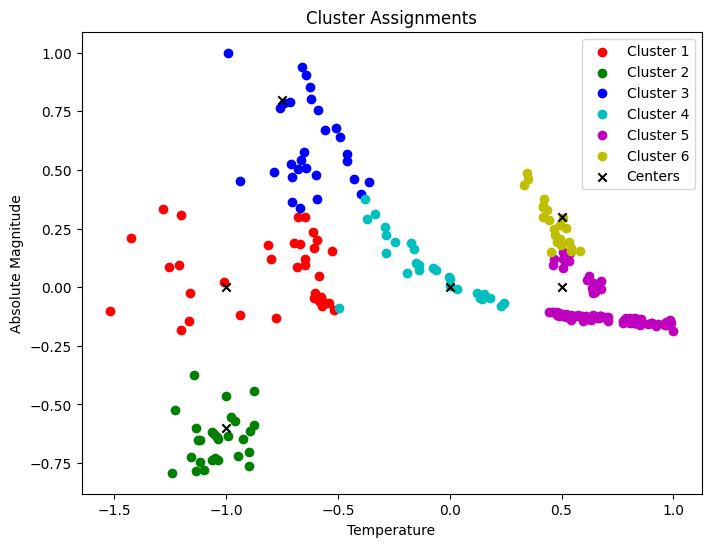

In [7]:
Temp_ary = np.array(df['Temperature'])
AbsMag_ary = np.array(df['AbsoluteMagnitude'])
combined_ary = np.column_stack((Temp_ary, AbsMag_ary)) # Combine the two arrays column-wise

distances = square_distance(combined_ary, centers) # Calculate distances and store the result

assigned_clusters = np.argmin(distances, axis=1)


plt.figure(figsize=(8, 6))

colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each cluster
for k in range(len(centers)):
    cluster_points = combined_ary[assigned_clusters == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', label='Centers')

plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.title('Cluster Assignments')
plt.legend()
plt.show()

In [36]:
def myKmeans(points, K, maxIter):
    centroids = points[np.random.choice(points.shape[0], K, replace=False)] # Randomly creating centers with respect to number K
    N = points.shape[0]  # Store centers coordinates
    assignments = np.zeros(N) # Empty array for assignments

    for iteration in range(maxIter):
        distances = square_distance(points, centroids)
        new_assignments = np.argmin(distances, axis=1) # Assign points to the nearest centroid based on minimum distance

        if np.all(assignments == new_assignments): # Check if assignments have changed. If not break the loop
            break

        assignments = new_assignments
# Recalculate the centroids
        for k in range(K):
            if np.any(assignments == k):
                centroids[k] = points[assignments == k].mean(axis=0)

    return assignments, centroids

# Example
points = train_data # Data to use
K = 5 # Number of centers
maxIter = 100 # Max number of Iterations

# Run the k-means algorithm
assignments, centroids = myKmeans(points, K, maxIter)

# Print the final cluster assignments and centroids
print("Final cluster assignments:", assignments)
print("Final centroids:", centroids)

Final cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 0 2 0 3 3 3 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 2 1 1 1 1 1 3 1 1 1 3 3 3 3 3 4 3 3 4 3 3 4
 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2
 0 2 3 1 3 3 3 3 3 3 3 3 3 4 4 4 4 4 3 3 3 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 3 1 1 3 3 3 1 3 3 1 3 4
 4 3 3 3 4 4 3 3 4 4 4 4 4 4 4 4 4 4]
Final centroids: [[ 0.70955011 -0.11944263  0.        ]
 [ 0.01540746  0.02669021  1.        ]
 [ 0.47156     0.23688993  1.        ]
 [-0.57544231  0.51924     2.        ]
 [-0.91984213 -0.27515831  3.45901639]]


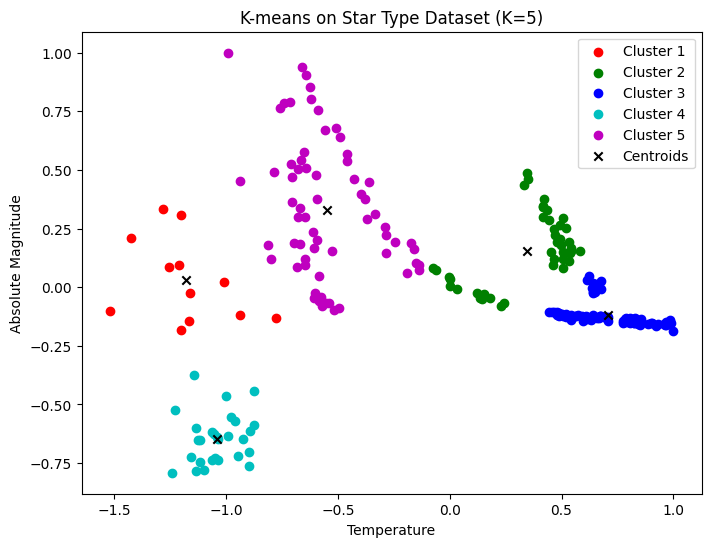

In [9]:
final_centroids = centroids

plt.figure(figsize=(8, 6))

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for k in range(K):
    cluster_points = points[assignments.flatten() == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

# Overlay the final centroids
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', label='Centroids')

plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.title(f'K-means on Star Type Dataset (K={K})')
plt.legend()
plt.show()


We are going to implement the KNN algorithm and apply it to the same data
as before
• First, we need to get labels for our dataset. This can be done with the K-
means algorithm!

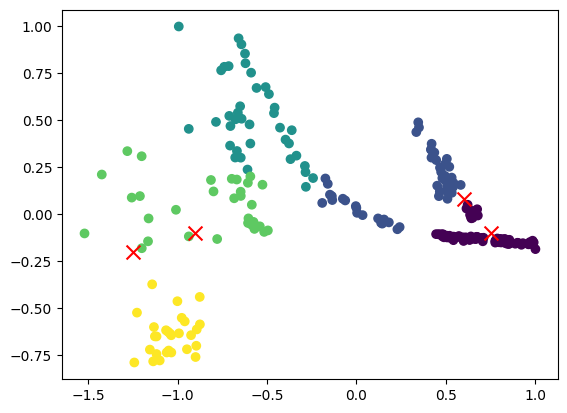

In [10]:
train_data = pd.read_csv('StarTypeDataset.csv').to_numpy()
K, maxIter = 5, 20
assignments, centroids = myKmeans(train_data, K, maxIter)
train_data = np.column_stack((train_data, assignments))


test_data = np.array([[0.75, -0.1], [-0.9, -0.1], [0.6, 0.08], [-1.25, -0.2]])
plt.scatter(train_data[:,0], train_data[:,1], c=train_data[:,2], marker='o')
plt.scatter(test_data[:,0], test_data[:,1], color='red', marker='x', s=100)
plt.show()


Implement a function named myKNN which implements the KNN classifier
* The input of the function is given by:
* A numpy array of the training dataset (features and labels) train_data
* A numpy array of the testing dataset (features only) test_data
* The integer size of the neighbourhood Nbr
* The output of the function is a numpy array row vector of inferred labels for
the testing data labels
* The labels of the training dataset should be obtained using the previously
implemented myKmeans algorithm.
* You may find the mode() function from scipy.stats useful



for the Kmeans algorithm lets assume that we do not know the center of the clusters only the labeled points from the train_data. Then we have to assign to which group the test_data belongs in. From this we can evaluate the group of the nieghbors near that point and assing a group to the test point.


In [40]:
def myKNN(train_data, test_data, Nbr):
    N_test = test_data.shape[0]
    labels = np.zeros(N_test, dtype=int) # Make an array to store the predicted labels for test_data
    train_features = train_data[:, :-1]  # All columns except the last one for features
    train_labels = train_data[:, -1]  # The last column for labels

    for i in range(N_test):
        distances = square_distance(train_features, test_data[i:i+1])
        distances = distances.flatten()  # Flatten the array to 1D
        nearest_neighbors_indices = np.argsort(distances)[:Nbr]  # Find the indices of the Nbr closest points in train_features
        nearest_labels = train_labels[nearest_neighbors_indices]  # Get the labels of the N-nearest neighbors
        most_common_label = mode(nearest_labels).mode
        labels[i] = most_common_label if most_common_label.size > 0 else nearest_labels[0]

    return labels

Nbr = 5  # Set the number of neighbors
test_assignments = knn_classify(test_data, train_data, assignments, Nbr) # Use assignments instead of assignments_train
print("Test data cluster assignments using KNN:", test_assignments)

Test data cluster assignments using KNN: [0 4 0 4]


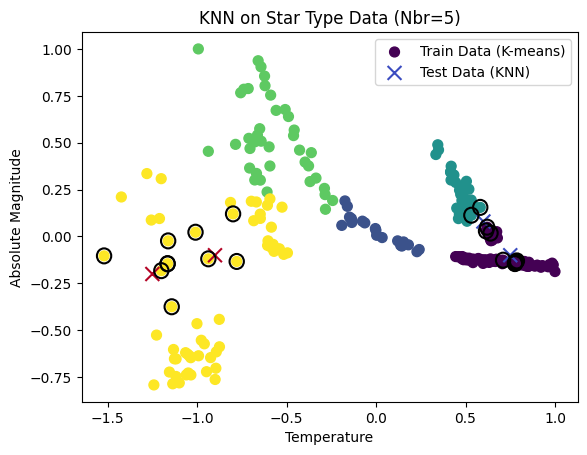

In [42]:
# Train data part of plot
plt.scatter(train_data[:, 0], train_data[:, 1], c=assignments, cmap='viridis', s=50, label='Train Data (K-means)')

# Test data part of plot
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_assignments, cmap='coolwarm', marker='x', s=100, label='Test Data (KNN)')
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.title(f'KNN on Star Type Data (Nbr={Nbr})')

for i in range(test_data.shape[0]):
    # Compute distances between the current test point and all training points
    # Use only the first two columns of train_data for distance calculation
    distances = square_distance(train_data[:, :2], test_data[i:i+1]).flatten()
    nearest_neighbors_indices = np.argsort(distances)[:Nbr]

    # Making the circles for the neighbores
    for neighbor in nearest_neighbors_indices:
        plt.gca().add_artist(plt.Circle(train_data[neighbor, :2], radius=0.04, color='black', fill=False, linewidth=1.5))

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [45]:
def decision_boundary(train_data):
    # Extract features and labels
    features = train_data[:, :-1]
    labels = train_data[:, -1]

    # Define the range of the grid
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    # Create a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Plot decision boundaries for K = 2 and K = 5
    plt.figure(figsize=(12, 5))

    # For K = 2
    Z = myKNN(train_data, grid_points, 2)
    Z = Z.reshape(xx.shape)  # Reshape result to match the grid shape
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Plot the filled contour for decision boundaries
    plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap='coolwarm', s=50)
    plt.title('Decision Boundary for K=2')
    plt.xlabel('Temperature')
    plt.ylabel('Absolute Magnitide')

    # For K = 5
    Z = myKNN(train_data, grid_points, 5)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap='coolwarm', s=50)
    plt.title('Decision Boundary for K=5')
    plt.xlabel('Temperature')
    plt.ylabel('Absolute Magnitude')

    # Show the plot
    plt.tight_layout()
    plt.show()



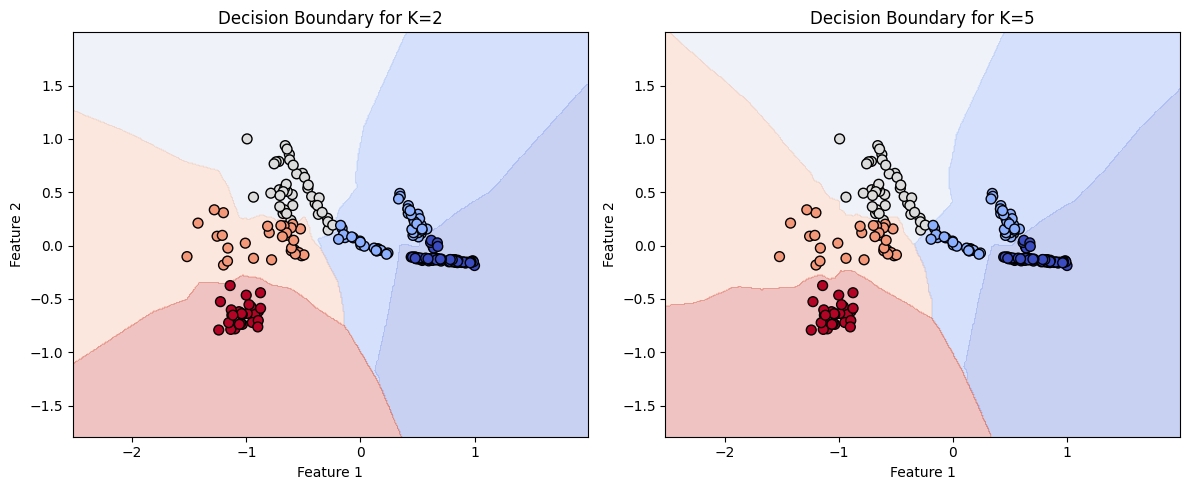

In [46]:
decision_boundary(train_data)